<a href="https://colab.research.google.com/github/mpangad90-web/MACHINE-LEANING/blob/main/MACHINE_L.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:

df = pd.read_csv("Dan.csv")

# Vérifier
print(df.head())

   Bande_passante_Mbps  Distance_km  Taux_utilisation_%  Nb_sauts  Type_lien  \
0                 10.0          2.0                30.0       2.0        0.0   
1                 20.0          5.0                40.0       3.0        0.0   
2                 20.0          5.0                40.0       3.0        0.0   
3                 50.0         10.0                60.0       4.0        0.0   
4                100.0         15.0                70.0       5.0        0.0   

   Latence_ms  
0        18.0  
1        25.0  
2        25.0  
3        40.0  
4        55.0  


In [4]:

df.shape

(24, 6)

In [5]:
df.isna
df.isna().sum()

,0
Bande_passante_Mbps,3
Distance_km,3
Taux_utilisation_%,3
Nb_sauts,3
Type_lien,3
Latence_ms,3


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Bande_passante_Mbps  21 non-null     float64
 1   Distance_km          21 non-null     float64
 2   Taux_utilisation_%   21 non-null     float64
 3   Nb_sauts             21 non-null     float64
 4   Type_lien            21 non-null     float64
 5   Latence_ms           21 non-null     float64
dtypes: float64(6)
memory usage: 1.3 KB


In [25]:
plt.figure(figsize=(20,6))

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

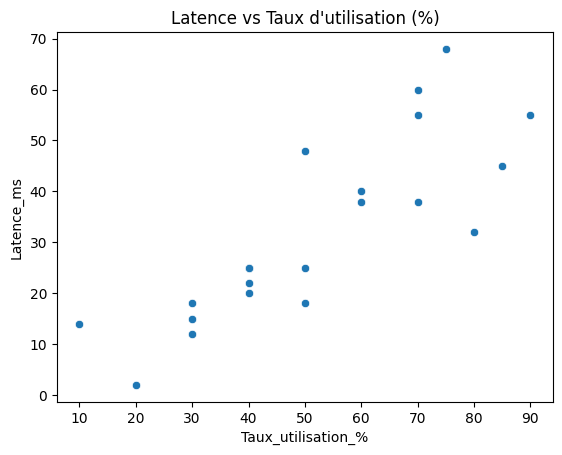

In [8]:
sns.scatterplot(x="Taux_utilisation_%", y="Latence_ms", data=df)
plt.title("Latence vs Taux d'utilisation (%)")
plt.show()


Text(0.5, 1.0, "Latence vs Taux d'utilisation (%)")

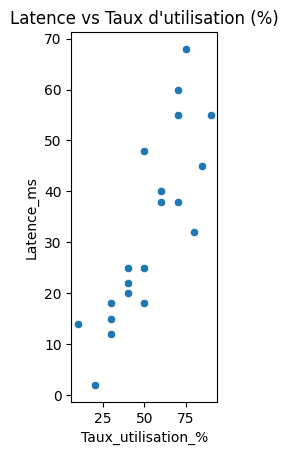

In [9]:
plt.subplot(2,3,1)
sns.scatterplot(x="Taux_utilisation_%", y="Latence_ms", data=df)
plt.title("Latence vs Taux d'utilisation (%)")

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

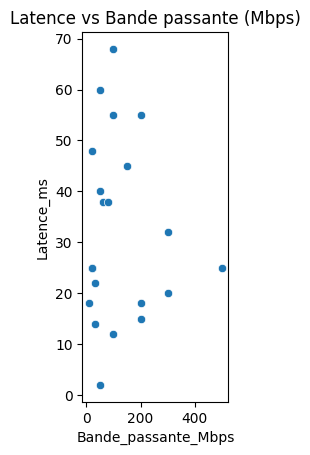

In [28]:
plt.subplot(1,3,3)
sns.scatterplot(x="Bande_passante_Mbps", y="Latence_ms",data=df)
plt.title("Latence vs Bande passante (Mbps)")
plt.tight_layout

In [11]:

X = df[["Bande_passante_Mbps","Distance_km","Taux_utilisation_%","Nb_sauts","Type_lien"]]
y = df["Latence_ms"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
print(df["Latence_ms"].isnull().sum())

3


In [13]:
X = df[["Bande_passante_Mbps","Distance_km","Taux_utilisation_%","Nb_sauts","Type_lien"]]
y = df["Latence_ms"]

In [15]:
df = df.dropna(subset=["Latence_ms"])

In [16]:
X = df[["Bande_passante_Mbps","Distance_km","Taux_utilisation_%","Nb_sauts","Type_lien"]]
y = df["Latence_ms"]

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
print(y.isnull().sum())

0


In [19]:
df= df.dropna(subset=["Latence_ms"])
X= df[["Bande_passante_Mbps","Distance_km","Taux_utilisation_%","Nb_sauts","Type_lien"]]
y= df["Latence_ms"]

In [20]:
y= pd.to_numeric(y, errors='coerce')
df= df.dropna(subset=["Latence_ms"])

In [21]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [22]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
y_pred= model.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))


Mean Squared Error: 89.82874713457122
R2 Score: 0.8334530793262919
Mean Absolute Error: 9.104974896168276


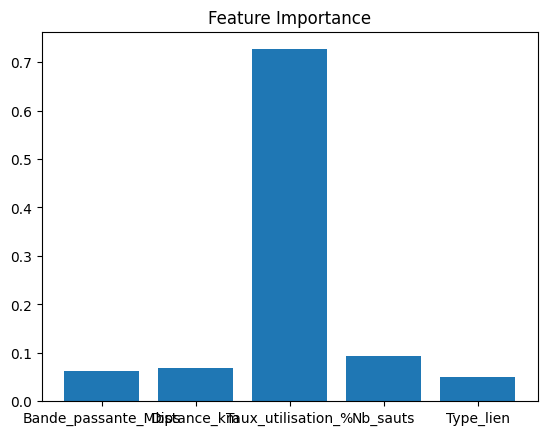

In [23]:
from matplotlib import rc_file
from sklearn.ensemble import RandomForestRegressor
rf_reg= RandomForestRegressor(n_estimators=120,random_state=42)
rf_reg.fit(X_train,y_train)
importances= rf_reg.feature_importances_
y_pred= rf_reg.predict(X_test)
plt.bar(X.columns,importances)
plt.title("Feature Importance")
plt.show()